In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

# Add a Dartmouth-y color theme
import matplotlib as mpl
dartmouth_colors = ["#00693E", "#12312B", "#C3DD88", "#6EAA8D", "#797979", "#EBF3EF"]
mpl.rcParams.update({
                        'figure.facecolor': "#EBF3EF",
                        'figure.figsize': [7.50, 3.50],
                        'axes.prop_cycle': mpl.cycler(color=dartmouth_colors),
                        'axes.facecolor': "#FFFFFF",
                        'axes.labelcolor': '#12312B',
                        'text.color': '#12312B'
                    })

%config InlineBackend.figure_formats = ['retina']


In [2]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Text(16.015625000000007, 0.5, 'Body mass [g]')

<Figure size 500x500 with 0 Axes>

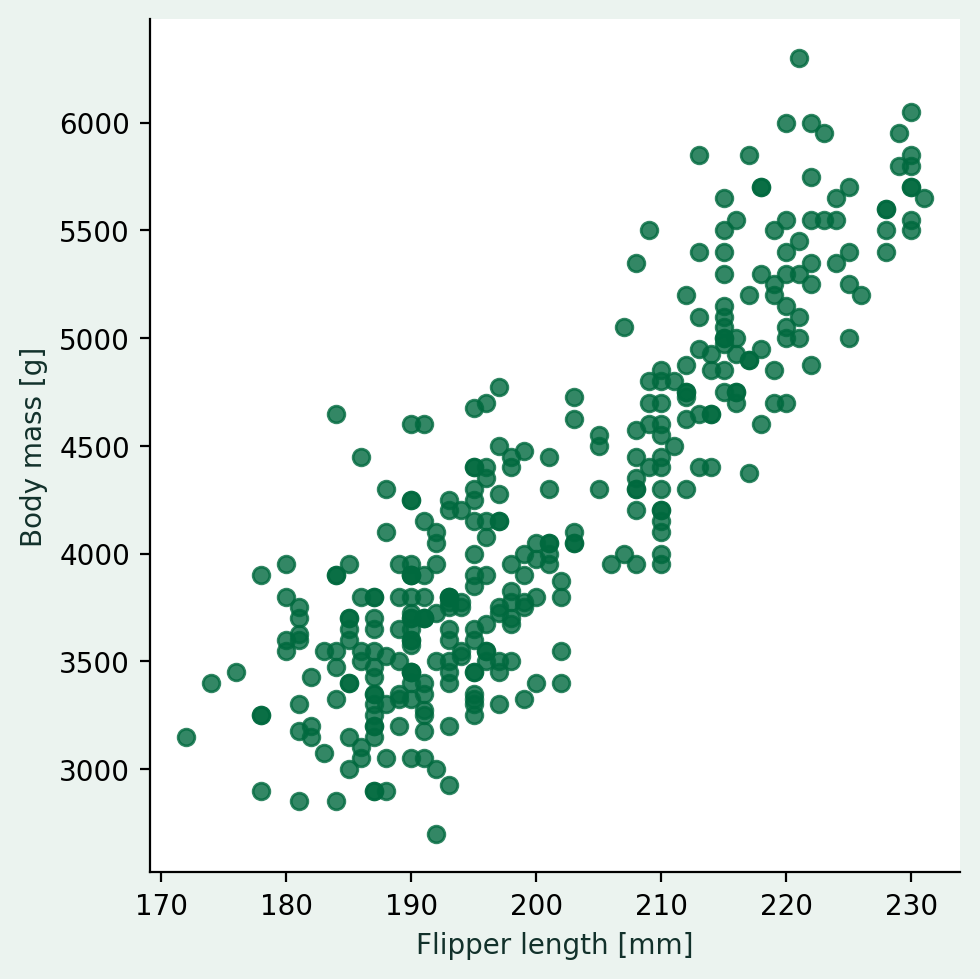

In [3]:
plt.figure(figsize=(5, 5))
sns.lmplot(penguins, x='flipper_length_mm', y='body_mass_g', fit_reg=False)
plt.xlabel('Flipper length [mm]')
plt.ylabel('Body mass [g]')

Text(16.015625000000007, 0.5, 'Body mass [g]')

<Figure size 500x500 with 0 Axes>

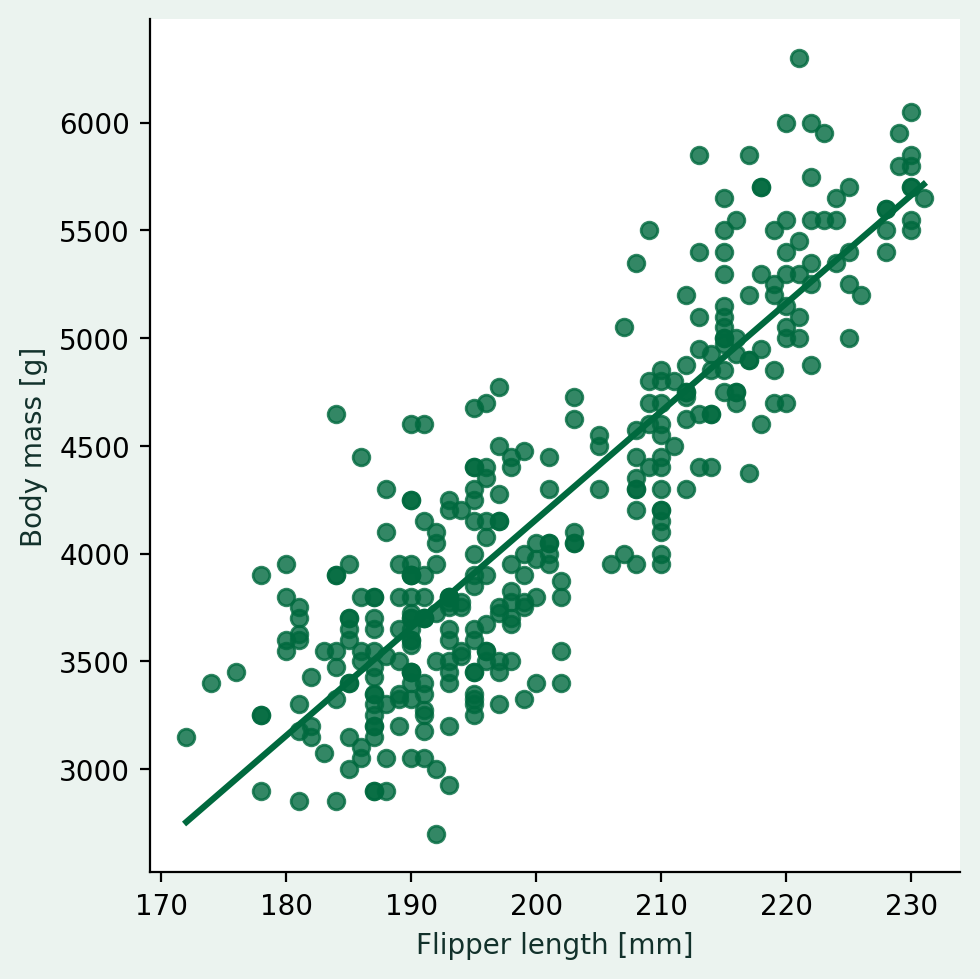

In [4]:
plt.figure(figsize=(5, 5))
sns.lmplot(penguins, x='flipper_length_mm', y='body_mass_g', ci=None)
plt.xlabel('Flipper length [mm]')
plt.ylabel('Body mass [g]')

<AxesSubplot: xlabel='Flipper length [mm]', ylabel='Body mass [g]'>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

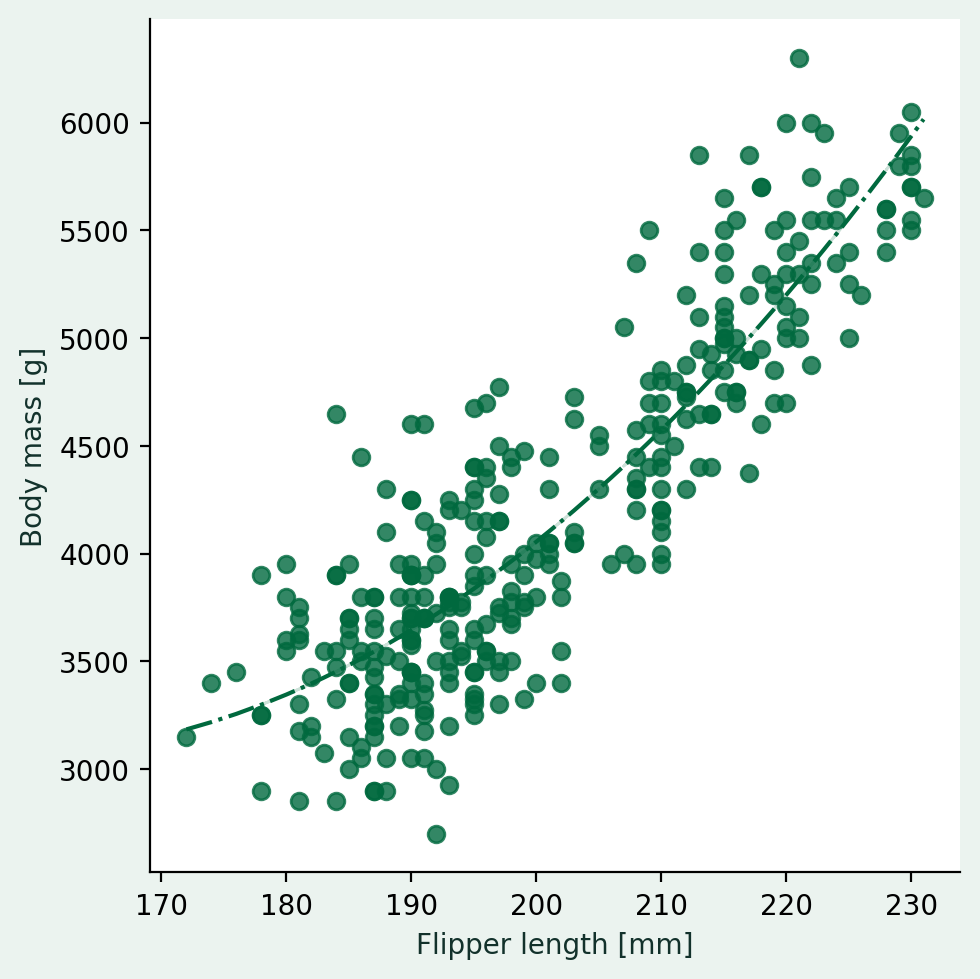

In [5]:
n = 2

plt.figure(figsize=(5, 5))
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(penguins.flipper_length_mm.values.reshape(-1, 1))
lr = LinearRegression().fit(X_poly, penguins.body_mass_g)
y_pred = lr.predict(X_poly)

plt.figure(figsize=(5, 5))
sns.lmplot(penguins, x='flipper_length_mm', y='body_mass_g', fit_reg=False)
plt.xlabel('Flipper length [mm]')
plt.ylabel('Body mass [g]')
sns.lineplot(x=penguins.flipper_length_mm, y=y_pred, linestyle='-.')

<AxesSubplot: xlabel='Flipper length [mm]', ylabel='Body mass [g]'>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

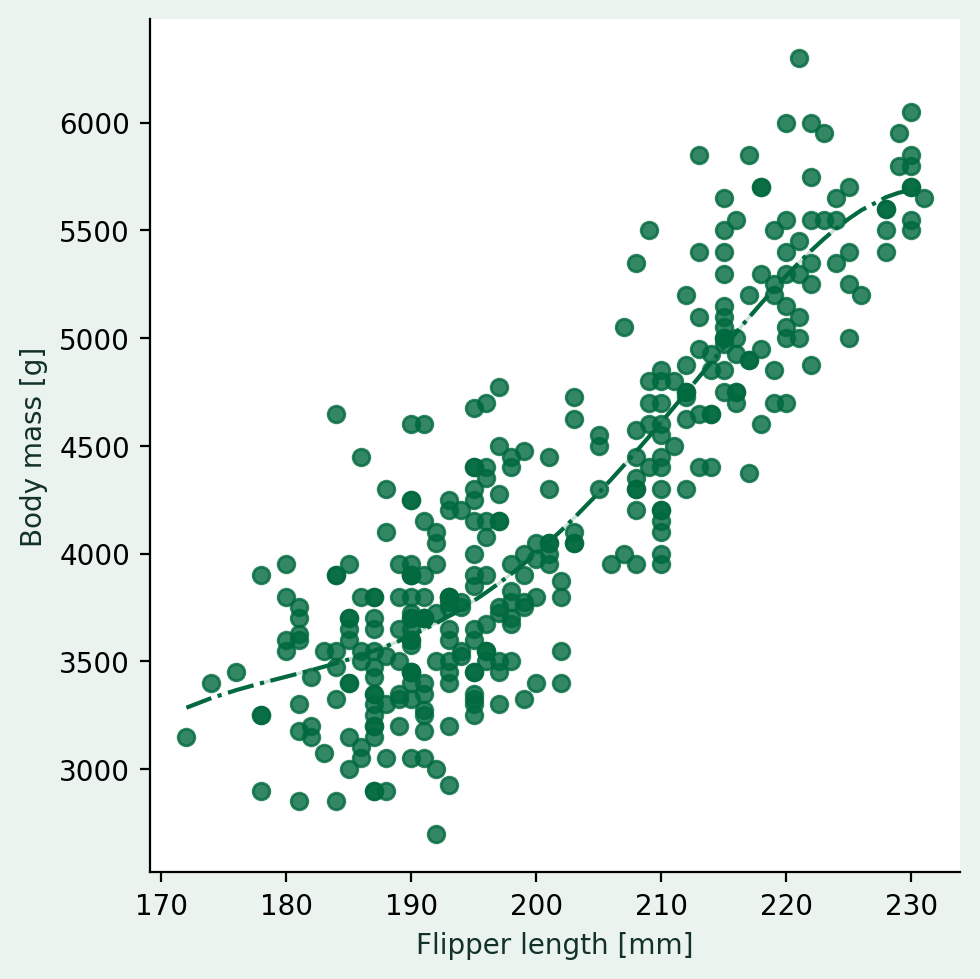

In [6]:
n = 5

plt.figure(figsize=(5, 5))
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(penguins.flipper_length_mm.values.reshape(-1, 1))
lr = LinearRegression().fit(X_poly, penguins.body_mass_g)
y_pred = lr.predict(X_poly)

plt.figure(figsize=(5, 5))
sns.lmplot(penguins, x='flipper_length_mm', y='body_mass_g', fit_reg=False)
plt.xlabel('Flipper length [mm]')
plt.ylabel('Body mass [g]')
sns.lineplot(x=penguins.flipper_length_mm, y=y_pred, linestyle='-.')

In [12]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(penguins.bill_length_mm, penguins.flipper_length_mm, penguins.body_mass_g)

ax.set_xlabel('Bill length [mm]')
ax.set_ylabel('Flipper length [mm]')
ax.set_zlabel('Body mass [g]')
fig.tight_layout()

%matplotlib inline

Text(0.5, 0, 'Body mass [g]')

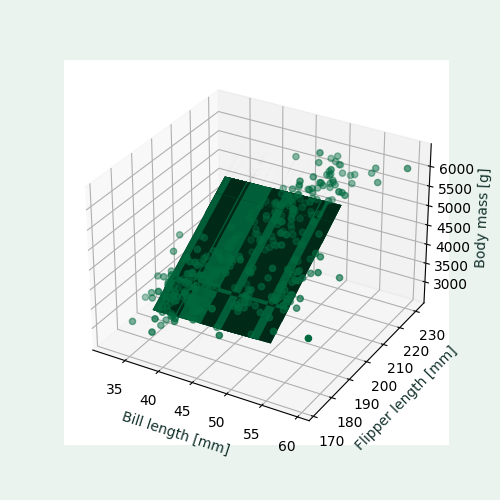

In [42]:
%matplotlib widget
X = penguins[['bill_length_mm', 'flipper_length_mm']]
lr = LinearRegression().fit(X, penguins.body_mass_g)
predicted = lr.predict(X)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(penguins.bill_length_mm, penguins.flipper_length_mm, penguins.body_mass_g)

bills, flippers = np.meshgrid(penguins.bill_length_mm, penguins.flipper_length_mm)
mass = lr.intercept_ + lr.coef_[0] * bills + lr.coef_[1] * flippers

ax.plot_surface(bills, flippers, mass, rstride=40)
ax.set_xlabel('Bill length [mm]')
ax.set_ylabel('Flipper length [mm]')
ax.set_zlabel('Body mass [g]')